# **Rockets**

Calculating the velocity of a rocket is a prime application of Newtons 2nd Law and the concervation of momentum. In this workspace, we will derive the ideal rocket equation and apply some of our Python plotting tools to help facilitate a visual understanding of the equations. 
<center>

![Rocket Motion](https://upload.wikimedia.org/wikipedia/commons/4/42/Var_mass_system.svg)

</center>

## **Rocket Equation Derivation**

Let's start by considering the rocket in the left box when $t = 0$, 
* $m$, the mass of the rocket
* $\Delta m$, the mass of the fuel
* $V$, the velocity of $(m+\Delta m)$ at time $t = 0$

Therefore, we can say the momentum of the rocket at $t = 0$ is:

$$P_1 = (m+\Delta m)V$$

Now, considering the rocket in the right box when $t = \Delta t$,
* $m$, the mass of the rocket
* $\Delta m$, the mass of the fuel
* $V + \Delta V$, the velocity of the rocket at time $t = \Delta t$
* $V_e$, the velocity of the exhaust relative to an observer outside the system 

Therefore, we can say the momentum of the rocket at $t = \Delta t$ is:

$$P_2 = m(V+\Delta V) + \Delta m V_e$$

The velocity of the exhuast relative to an outside overserver, $V_e$, is not typically very useful. However, the velocity of the exhaust relative to the rocket, $\nu_e$, is something we can use! The relationship between these is:

$$V_e = V - \nu_e$$

Using the above information, show that:

$$P_2 - P_1 = m\Delta V - \nu_e\Delta m$$

Write out your work in $\LaTeX$ in the text box below.


$$P_2 - P_1= \left( m(V+\Delta V) + \Delta m V_e \right) - \left((m+\Delta m)V \right)$$
$$=mV + m \Delta V + \Delta m V_e - mV - \Delta m V$$
$$ =m \Delta V + \Delta m(V-v_e)  - \Delta m V$$
$$ = m \Delta V + \Delta mV- \Delta m v_e  - \Delta m V$$
$$ P_2 - P_1=m \Delta V - v_e\Delta m  $$

Newton's 2nd Law allows us to relate external forces to changes in linear momentum: 

$$\sum_iF_i= \lim_{t\to 0} \frac{P_2-P_1}{\Delta t} $$

Using the fact that $dm = -\Delta m$ since ejecting a positive $dm$ results in a decrease in total mass over time, we can write:

$$\sum_iF_i = m\frac{dV}{dt} + \nu_e\frac{dm}{dt}$$

Which give us our general rocket equation.

## **No External Force**


In the basic case where there are no external forces acting on our rocket, our rocket equation is simply:

$$0 = m\frac{dV}{dt} + \nu_e\frac{dm}{dt}$$

From here, we can make another assumption that the burn rate, $\beta$, is constant. This allows us to write the change in mass of the rocket in time as a linear function:

$$m_t = m_0 - \beta t$$

So the rate of change in mass with time is:

$$\frac{dm}{dt}=-\beta$$

Using the above equations, the acceleration of the rocket can be expressed as:

$$a_t = \frac{dV}{dt}=\frac{\nu_e\beta}{m_0 - \beta t}$$

Assume the following conditions:
* $\beta$ = 50 kg/s
* $\nu_e$ = 2000 m/s
* starting position, velocity, and acceleration = 0

Make a figure that compares the acceleration over time for the following 3 rockets with the limitation that fuel can only make up 90% of the total inital mass of each rocket:

1. Rocket 1 with $m_0$ = 5000 kg
2. Rocket 2 with $m_0$ = 7500 kg
3. Rocket 3 with $m_0$ = 10000 kg

Note: If you'd like an extra challenge, set up your plot so that it functions using `ipywidgets` or `matplotlib.widgets`! Have your plot update what value it shows depending on where an interactive slider is placed. 


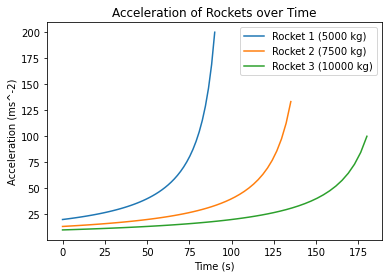

In [1]:
"""
Rocket Acceleration Equation - No External Force
"""
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets

v_e = 2000 # m/s
beta = 50 # kg/s


def rocket_acceleration(v_e, beta, m_0, t):
    a = v_e * beta / (m_0 - beta * t)
    return a

def get_t_final(beta, m_0):
    # it is clear the at at time 0 the mass of the rocket is m_0
    # to get the time when the rocket has burned 90% of its fuel we can solve:
    # .1m_0 = m_0 - beta * t
    # beta * t = .9m_0
    # t = .9m_0 / beta
    t_final = .9 * m_0 / beta
    return t_final

def get_times_and_accelerations(m_0):
    # assumes that you burn all the fuel with is 90% of the rockets weight
    time = np.linspace(0, int(get_t_final(beta, m_0)))

    acceleration = [rocket_acceleration(v_e, beta, m_0, t) for t in time]

    return time , acceleration

plt.plot(get_times_and_accelerations(5000)[0], get_times_and_accelerations(5000)[1], label = "Rocket 1 (5000 kg)")
plt.plot(get_times_and_accelerations(7500)[0], get_times_and_accelerations(7500)[1], label = "Rocket 2 (7500 kg)")
plt.plot(get_times_and_accelerations(10000)[0], get_times_and_accelerations(10000)[1], label = "Rocket 3 (10000 kg)")

plt.ylabel("Acceleration (ms^-2)")
plt.xlabel("Time (s)")
plt.title("Acceleration of Rockets over Time")
plt.legend()
plt.show()



---



Great, now use separation of variables to integrate and show that the rocket velocity is:

$$V_f-V_i = \nu_e\ln(\frac{m_0}{m_0-\beta t})$$

$$ a_t = \frac{dv}{dt} = \frac{v_e\beta}{m_0 - \beta t}$$
$$dv =\frac{v_e\beta}{m_0 - \beta t}dt $$
$$\int_{v(0)}^{v(t)}  \,dv = \int_{t=0}^{t=t}  \frac{v_e\beta}{m_0 - \beta t} \,dt$$
$$v(t) - v(0) = v_e \beta \int_{t=0}^{t=t} \frac{1}{m_0 - \beta t} \,dt$$
$$ u = m_0 - \beta t$$
$$du = -\beta dt$$
$$ \frac{-1}{\beta} du = dt$$
$$V_f - V_i = - v_e \int_{t=0}^{t=t} \frac{1}{u} \,du $$
$$ V_f - V_i = - v_e \left. ln|u| \right|_{t=0}^{t = t} $$
$$ V_f - V_i = - v_e \left. ln|m_0 - \beta t| \right|_{t=0}^{t = t} $$
$$ V_f - V_i = - v_e (ln|m_0 - \beta t| - ln|m_0|)$$
$$ V_f - V_i = v_e *ln\left( \frac{m_0}{m_0-\beta t}\right) $$


Using the same assumptions as before, make a plot showing the velocity of the different rockets in time.

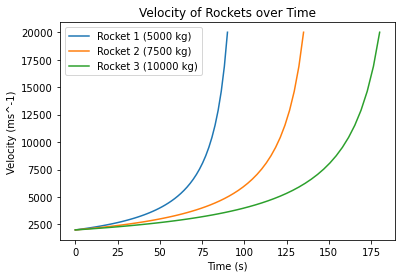

In [3]:
"""
Rocket Velocity Equation - No External Force
"""
# assuming initial velocity is zero
def rocket_velocity(v_e, beta, m_0, t):
    v = v_e * np.log(np.exp((m_0 / (m_0 - beta * t))))
    return v

def get_times_and_velocities(m_0):
    # assumes that you burn all the fuel with is 90% of the rockets weight
    time = np.linspace(0, int(get_t_final(beta, m_0)))

    velocities = [rocket_velocity(v_e, beta, m_0, t) for t in time]

    return time , velocities

plt.plot(get_times_and_velocities(5000)[0], get_times_and_velocities(5000)[1], label = "Rocket 1 (5000 kg)")
plt.plot(get_times_and_velocities(7500)[0], get_times_and_velocities(7500)[1], label = "Rocket 2 (7500 kg)")
plt.plot(get_times_and_velocities(10000)[0], get_times_and_velocities(10000)[1], label = "Rocket 3 (10000 kg)")

plt.ylabel("Velocity (ms^-1)")
plt.xlabel("Time (s)")
plt.title("Velocity of Rockets over Time")
plt.legend()
plt.show()



---



We can also calculate the distance the rocket will travel over the course of its fuel burn by substituting $\frac{dx}{dt}=V$, then perform separation of variables again. Doing so should result in:

$$x_f - x_i = \nu_e[t+(\frac{m_0}{\beta})\ln(1-\frac{\beta t}{m_0})]$$

Using the same assumptions as before, make a plot showing the distance traveled over the course of their burn phases for each of the rockets.

In [7]:
"""
Rocket Distance Equation - No External Force
"""



'\nRocket Distance Equation - No External Force\n'